In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Plotting the normalised data

In [2]:
df = pd.read_csv("../data/interim/split/sorted_train_data_mm.csv")
normalized_df = (df - df.mean()) / df.std()

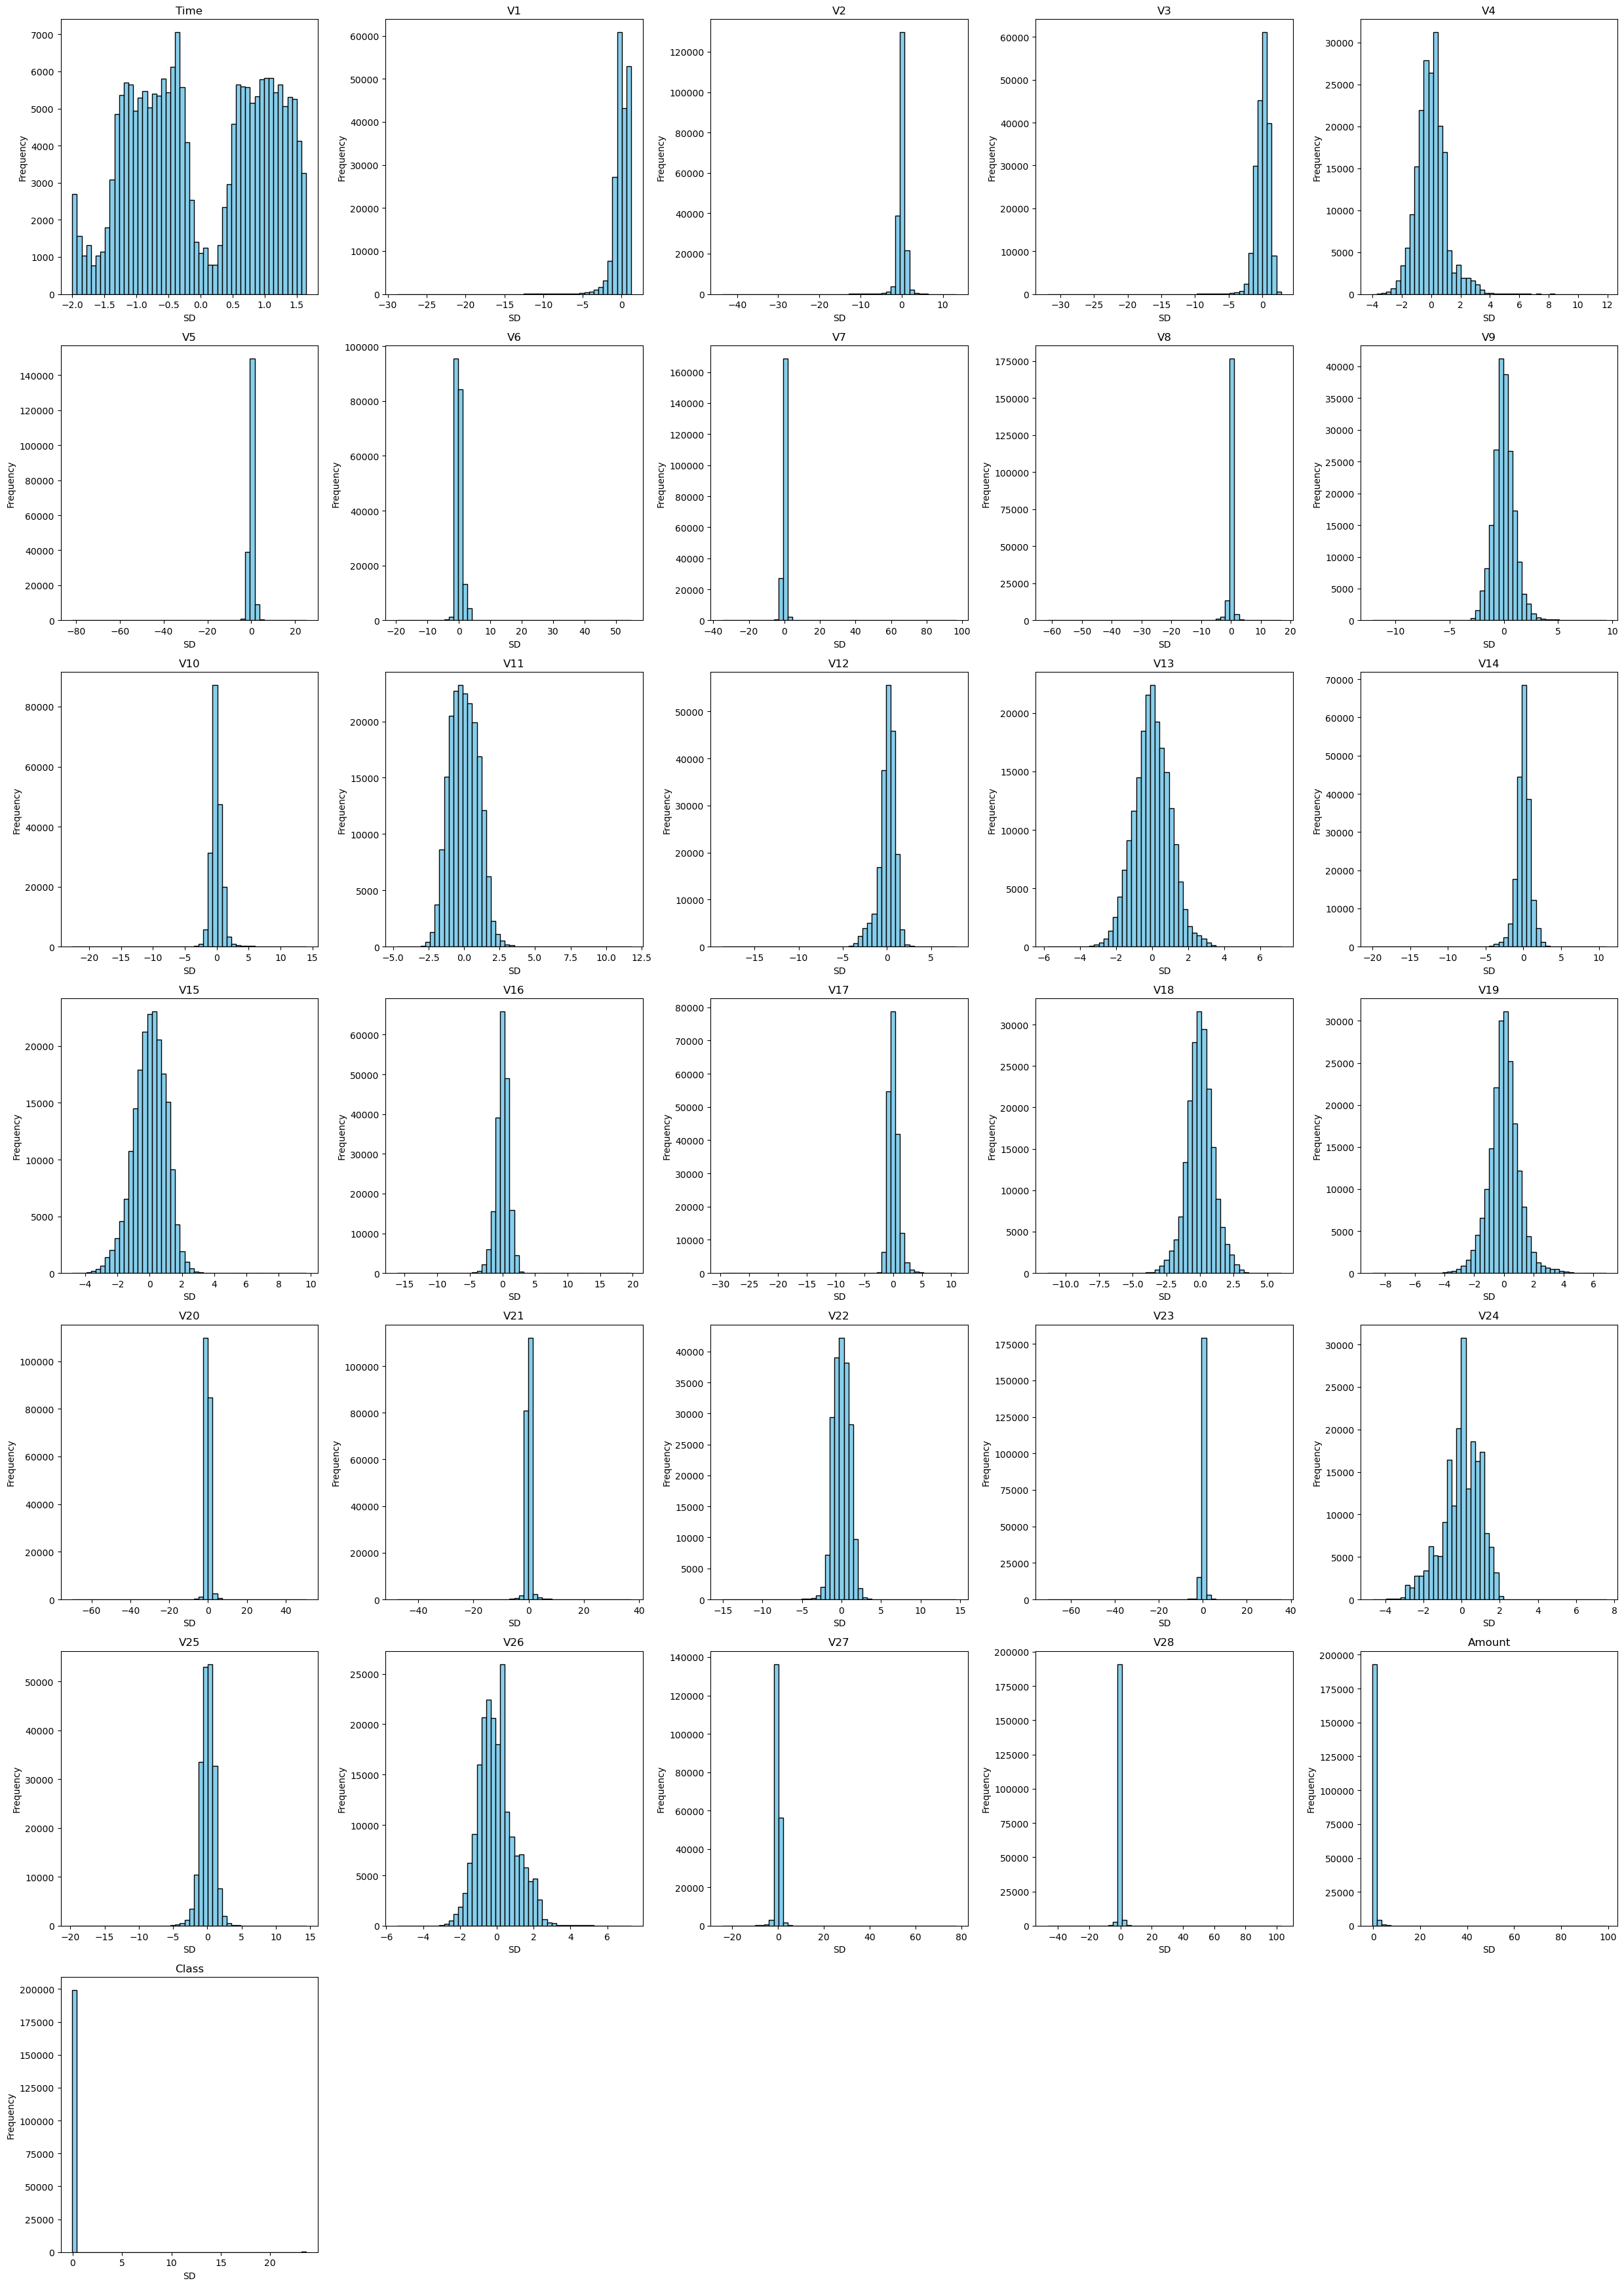

In [3]:
# Get the number of columns in the DataFrame
num_cols = len(normalized_df.columns)

# Calculate the number of rows needed
num_rows = (num_cols + 4) // 5  # +4 ensures rounding up for integer division

# Set up the subplot grid with 5 columns
fig, axes = plt.subplots(num_rows, 5, figsize=(25, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(normalized_df.columns):
    ax = axes[i]
    ax.hist(normalized_df[col], bins=50, color="skyblue", edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("SD")
    ax.set_ylabel("Frequency")

# Remove any unused subplots
for i in range(num_cols, num_rows * 5):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# The comparison plot, between original data and syntethic data

In [5]:
test_data = pd.read_csv("../data/interim/split/sorted_test_data_mm.csv")
synthetic_data_from_data = pd.read_csv(
    "../data/interim/2767_b_b0_1kl_0_0001_l_2_n256_128_sample_no_batch.csv",
)

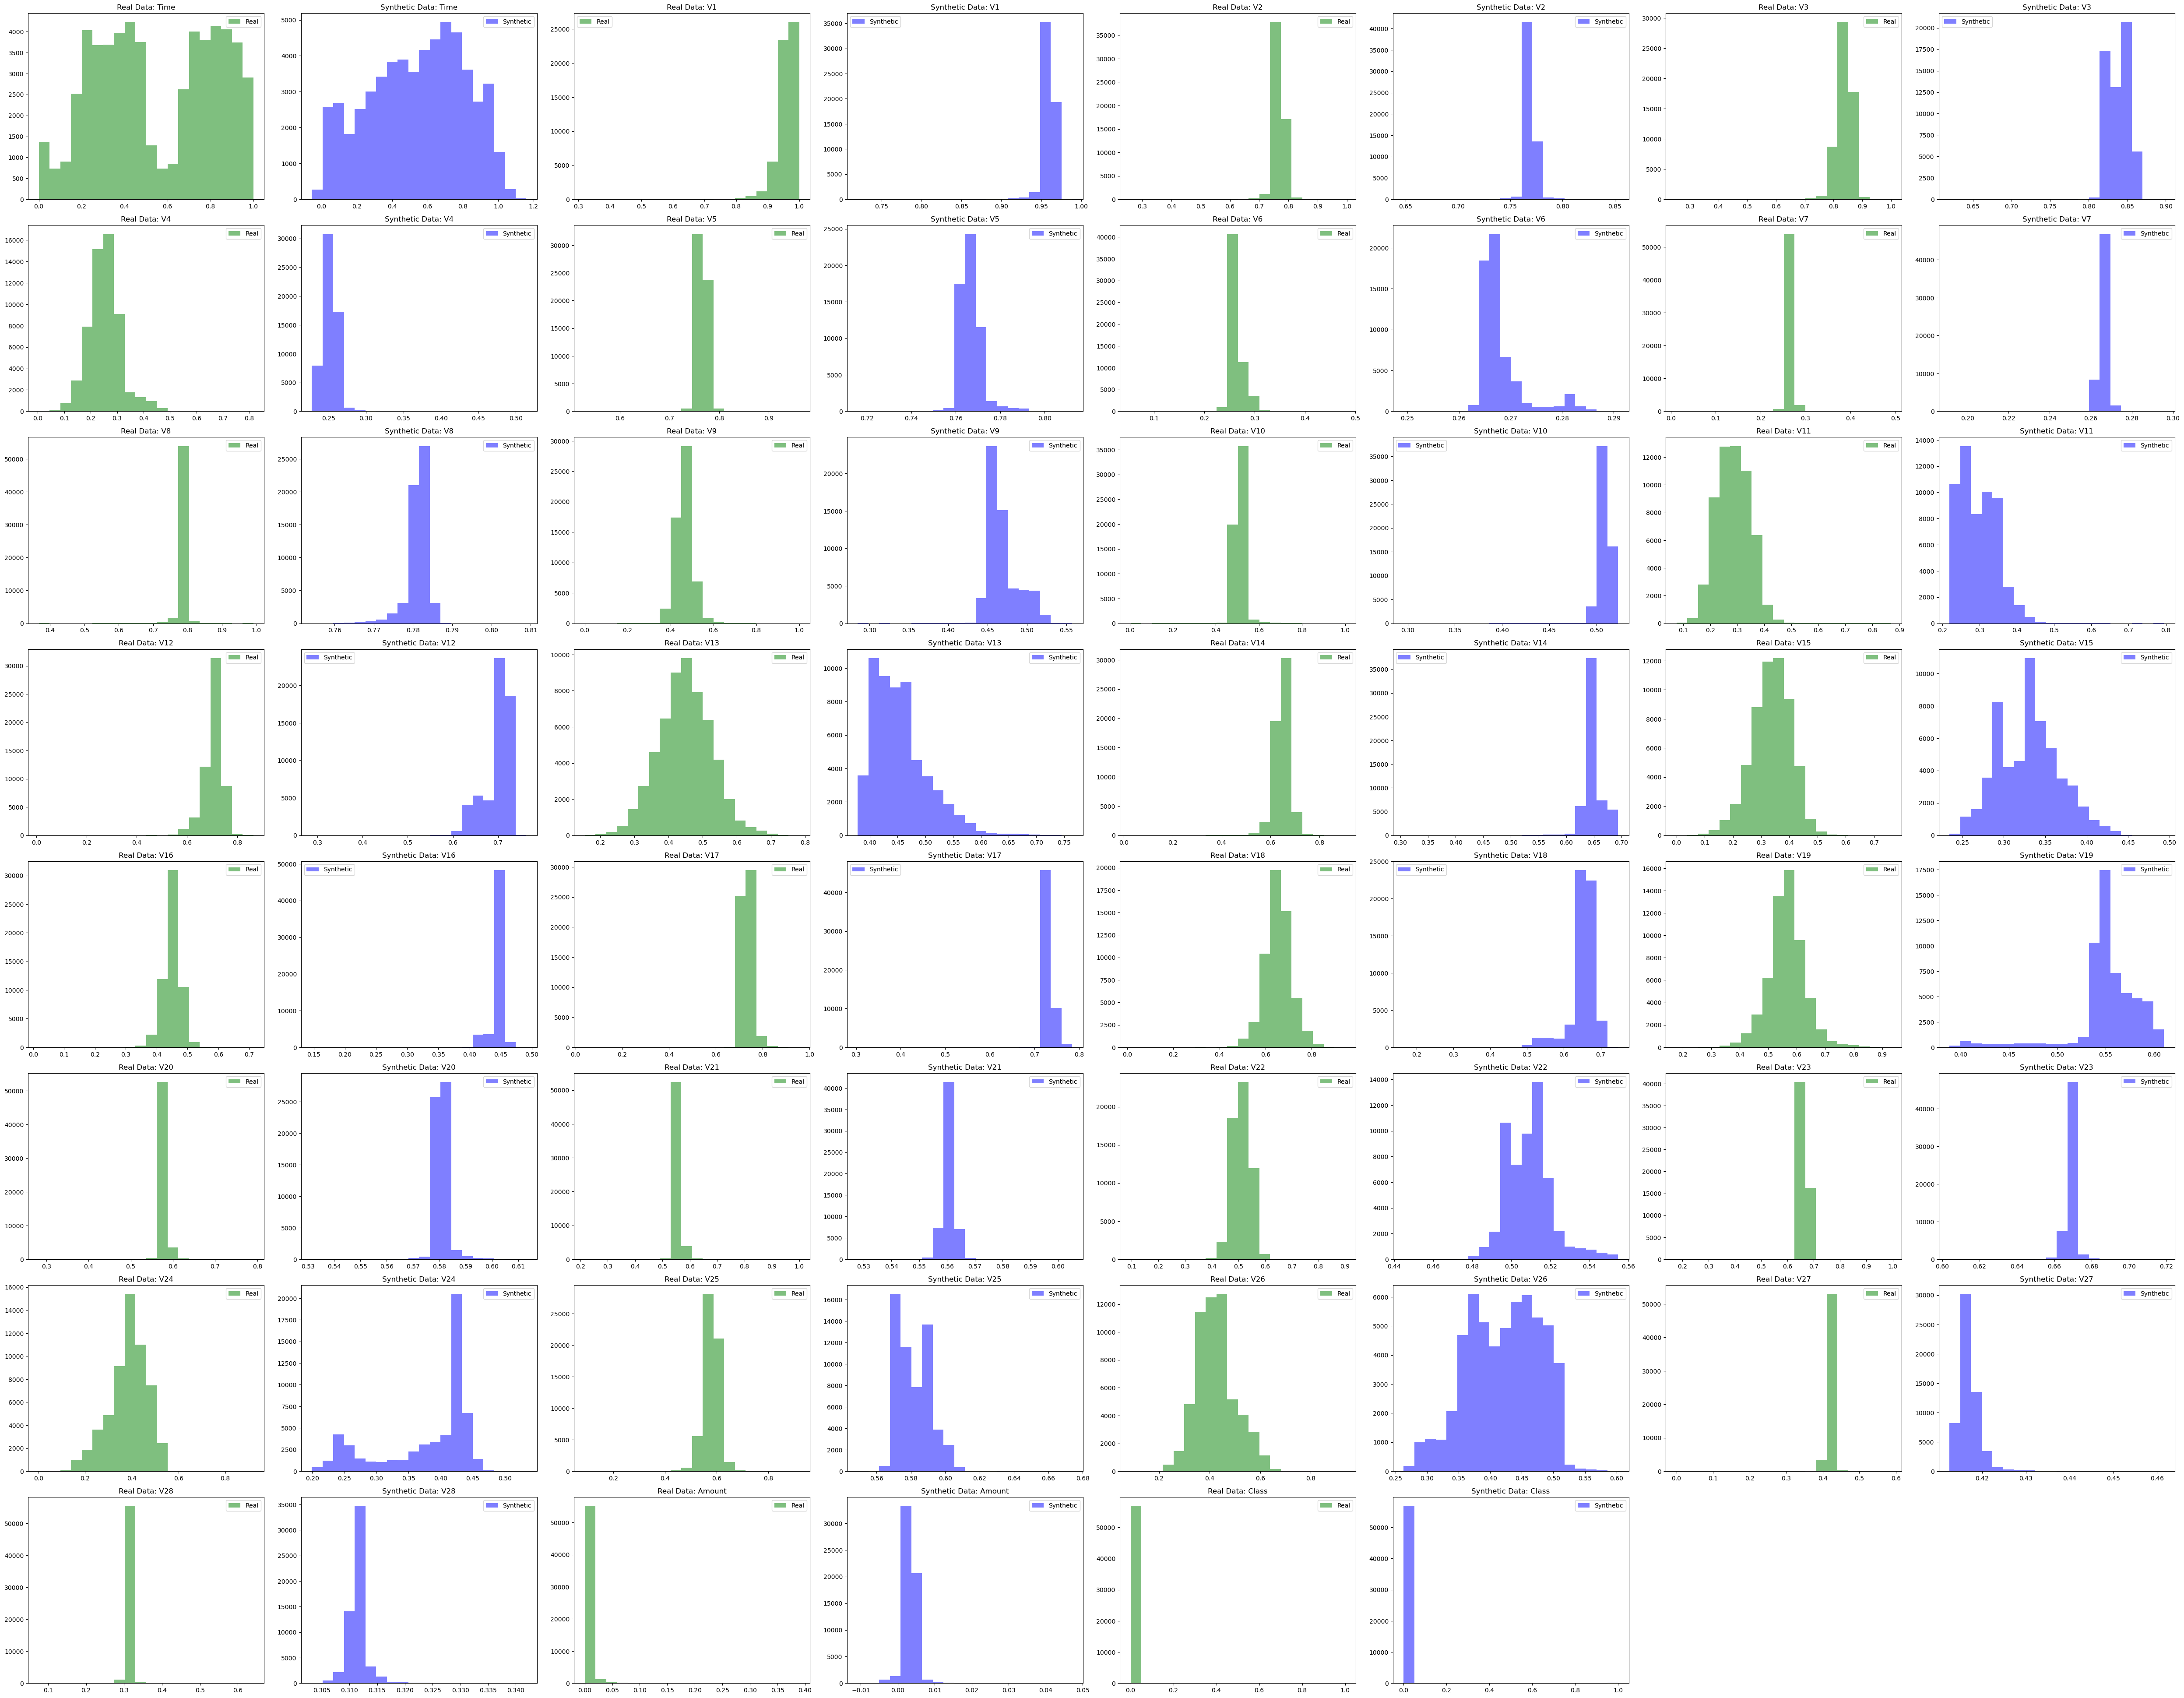

Summary statistics for the real data:
               Time            V1            V2            V3            V4  \
count  56962.000000  56962.000000  56962.000000  56962.000000  56962.000000   
mean       0.549444      0.958268      0.767352      0.837303      0.252300   
std        0.275304      0.033409      0.017188      0.026541      0.062566   
min        0.000012      0.320229      0.260145      0.253770      0.003660   
25%        0.313578      0.942616      0.760986      0.821806      0.214950   
50%        0.491617      0.958742      0.767921      0.840313      0.251633   
75%        0.807336      0.980723      0.775739      0.855144      0.285267   
max        0.999971      0.999733      0.993769      1.000000      0.814890   

                 V5            V6            V7            V8            V9  \
count  56962.000000  56962.000000  56962.000000  56962.000000  56962.000000   
mean       0.765689      0.263049      0.265335      0.785411      0.463065   
std        0.

In [6]:
# For each feature, create a histogram for the real and synthetic data
num_features = len(test_data.columns)

# Create a single figure for all plots
plt.figure(figsize=(50, 150))

for index, feature in enumerate(
    test_data.columns
):  # Assuming train_data is your DataFrame with features

    plt.subplot(num_features, 8, 2 * index + 1)
    plt.hist(test_data[feature], bins=20, alpha=0.5, color="g", label="Real")
    plt.title(f"Real Data: {feature}")
    plt.legend()

    plt.subplot(num_features, 8, 2 * index + 2)
    plt.hist(
        synthetic_data_from_data[feature],
        bins=20,
        alpha=0.5,
        color="b",
        label="Synthetic",
    )
    plt.title(f"Synthetic Data: {feature}")
    plt.legend()

plt.tight_layout()  # Adjust layout

plt.show()

# Print the summary statistics for the real and synthetic data
print("Summary statistics for the real data:")
print(test_data.describe())
print("\nSummary statistics for the synthetic data:")
print(synthetic_data_from_data.describe())

In [ ]:
# 1  1 a
# 1 1 | 1 b
# 1 1 | 1 1 c
# 1 | 1 1 d

# Analysis of the Hyperparamter Tuning Process

In [2]:
# Directory containing the CSV files
directory = "../notebooks/logs/hparam_tuning_vae_2/CSV"

# List to store DataFrames from each CSV file
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Load the CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df.query("num_units >= num_units1")

In [5]:
grouped_df_latent_dim = combined_df.groupby("num_embedded").mean()
grouped_df_num_units = combined_df.groupby("num_units").mean()
grouped_df_num_units = combined_df.groupby("num_units").mean()
grouped_df_kl_loss_rate = combined_df.groupby("KL_LOSS_RATE").mean()
grouped_df_binar_weight = combined_df.groupby("BINARY_WEIGHT").mean()

In [6]:
df_true_true = combined_df.query("bool_layer_2 == True & bool_layer_4 == True").mean()
df_true_false = combined_df.query("bool_layer_2 == True & bool_layer_4 == False").mean()
df_false_true = combined_df.query("bool_layer_2 == False & bool_layer_4 == True").mean()
df_false_false = combined_df.query("bool_layer_2 == False & bool_layer_4 == False").mean()

In [3]:
combined_df.sort_values("val_loss", ascending=True)

,BINARY_WEIGHT,KL_LOSS_RATE,bool_layer_2,bool_layer_4,num_embedded,num_units,num_units1,val_loss,val_mean_binary_value,val_mean_abs_diff_cont,val_mean_abs_diff_class,val_mean_kl_loss,val_mean_kl_div,val_loss_sample,val_mean_binary_value_sample,val_mean_abs_diff_cont_sample,val_mean_abs_diff_class_sample,val_mean_kl_div_sample
3646,0.1,0.0001,True,False,64.0,512.0,512.0,0.002573,0.001543,0.031125,0.002959,3.483166,0.222620,0.117506,0.06250,0.264812,0.063850,4.719650
2371,0.1,0.0001,False,False,64.0,512.0,512.0,0.002820,0.001543,0.032084,0.002959,3.462000,0.413541,0.119272,0.00000,0.265339,0.001543,9.127047
1393,0.1,0.0001,True,False,32.0,512.0,512.0,0.003021,0.001543,0.028994,0.002959,3.415862,0.396443,0.064658,0.03125,0.199303,0.032697,5.267993
3464,0.1,0.0001,False,False,64.0,512.0,256.0,0.003309,0.001543,0.033343,0.002959,3.664489,0.596856,0.154855,0.03125,0.311395,0.032697,16.281433
3561,0.1,0.0001,True,False,64.0,512.0,256.0,0.003417,0.001543,0.033821,0.002959,3.819325,0.505985,0.179023,0.00000,0.330421,0.001543,20.130489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,10.0,10.0000,True,True,2.0,128.0,128.0,0.175241,0.000000,0.047159,0.001543,0.001078,1.567714,0.010997,0.00000,0.046679,0.001543,0.813582
419,10.0,10.0000,False,True,4.0,512.0,512.0,0.175943,0.000000,0.044207,0.001543,0.002834,1.050087,0.010374,0.00000,0.042851,0.001543,0.939060
1748,10.0,10.0000,True,False,32.0,512.0,512.0,0.184024,0.001859,0.072883,0.003273,0.013279,1.582344,0.015205,0.00000,0.072927,0.001543,1.515392
1888,10.0,10.0000,True,True,4.0,512.0,64.0,0.186722,0.000000,0.055839,0.001543,0.000014,1.260600,0.012482,0.00000,0.057882,0.001543,1.630955


In [9]:
combined_df.loc[2767]

BINARY_WEIGHT                           0.1
KL_LOSS_RATE                         0.0001
bool_layer_2                           True
bool_layer_4                          False
num_embedded                            2.0
num_units                             256.0
num_units1                            128.0
val_loss                           0.008417
val_mean_binary_value              0.001543
val_mean_abs_diff_cont             0.048883
val_mean_abs_diff_class            0.002959
val_mean_kl_loss                   6.465084
val_mean_kl_div                    1.041506
val_loss_sample                    0.110232
val_mean_binary_value_sample         0.0625
val_mean_abs_diff_cont_sample      0.286647
val_mean_abs_diff_class_sample      0.06385
val_mean_kl_div_sample            21.226524
Name: 2767, dtype: object

# Plotting Validation Loss vs Latent Dim and Number of Nodes

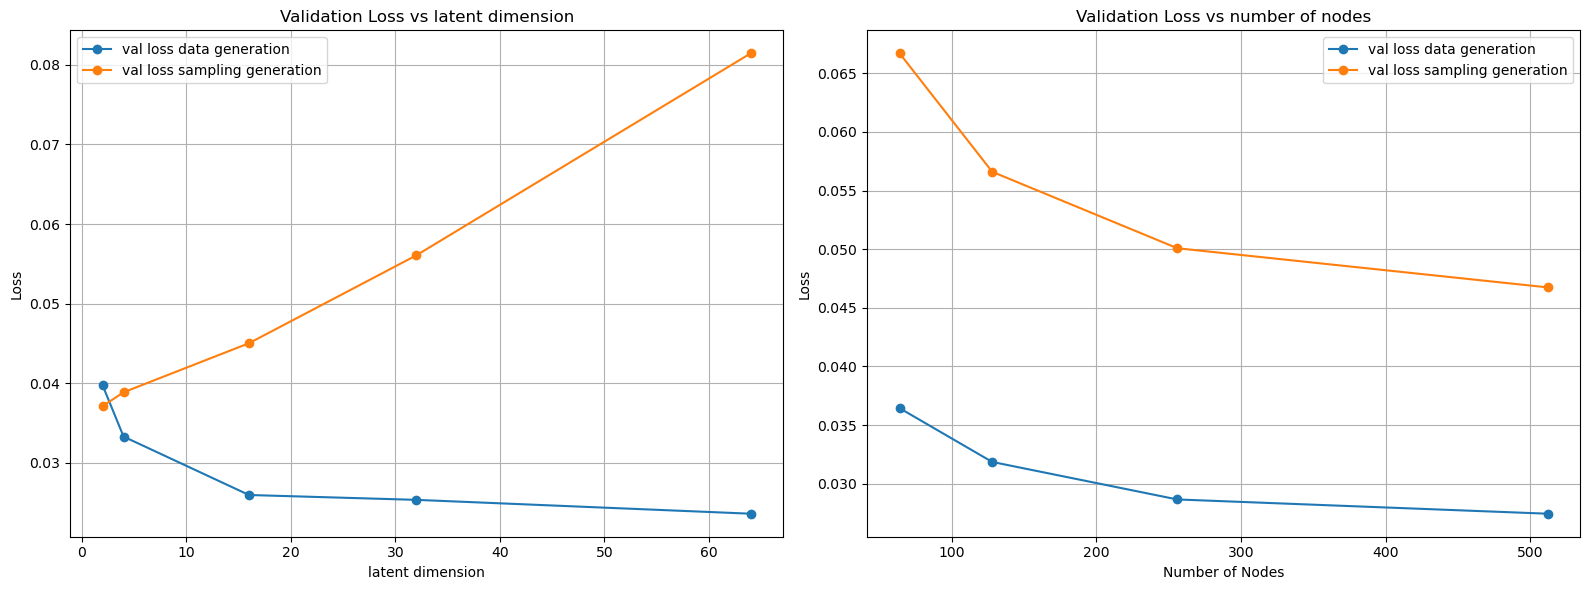

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting for the first subplot
axs[0].plot(
    grouped_df_latent_dim.index,
    grouped_df_latent_dim["val_loss"],
    marker="o",
    label="val loss data generation",
)
axs[0].plot(
    grouped_df_latent_dim.index,
    grouped_df_latent_dim["val_loss_sample"],
    marker="o",
    label="val loss sampling generation",
)
axs[0].set_xlabel("latent dimension")
axs[0].set_ylabel("Loss")
axs[0].set_title("Validation Loss vs latent dimension")
axs[0].legend()
axs[0].grid(True)


# Plotting for the second subplot
axs[1].plot(
    grouped_df_num_units.index,
    grouped_df_num_units["val_loss"],
    marker="o",
    label="val loss data generation",
)
axs[1].plot(
    grouped_df_num_units.index,
    grouped_df_num_units["val_loss_sample"],
    marker="o",
    label="val loss sampling generation",
)
axs[1].set_xlabel("Number of Nodes")
axs[1].set_ylabel("Loss")
axs[1].set_title("Validation Loss vs number of nodes")
axs[1].legend()
axs[1].grid(True)


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Plotting Different Architecture Types vs. Validation Loss

In [ ]:
df_true_true = combined_df.query("bool_layer_2 == True & bool_layer_4 == True").mean()
df_true_false = combined_df.query("bool_layer_2 == True & bool_layer_4 == False").mean()
df_false_true = combined_df.query("bool_layer_2 == False & bool_layer_4 == True").mean()
df_false_false = combined_df.query(
    "bool_layer_2 == False & bool_layer_4 == False"
).mean()

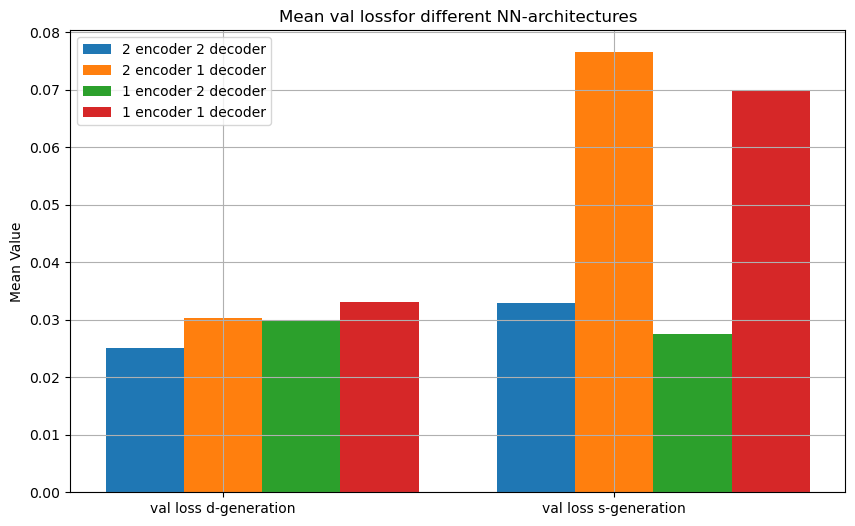

In [ ]:



# DataFrames with mean values
dfs = [df_true_true, df_true_false, df_false_true, df_false_false]

# Column names
columns = ["val_loss", "val_loss_sample"]

# Labels for the x-axis
labels = [
    "2 encoder 2 decoder",
    "2 encoder 1 decoder",
    "1 encoder 2 decoder",
    "1 encoder 1 decoder",
]

# Width of each bar
bar_width = 0.2

# Positions for the bars
positions = np.arange(len(columns))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over DataFrames and plot bars
for i, df in enumerate(dfs):
    ax.bar(positions + i * bar_width, df[columns], width=bar_width, label=labels[i])

# Set x-axis labels and ticks
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(["val loss d-generation", "val loss s-generation"])

# Set labels, title, legend, and grid
ax.set_ylabel("Mean Value")
ax.set_title("Mean val lossfor different NN-architectures")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

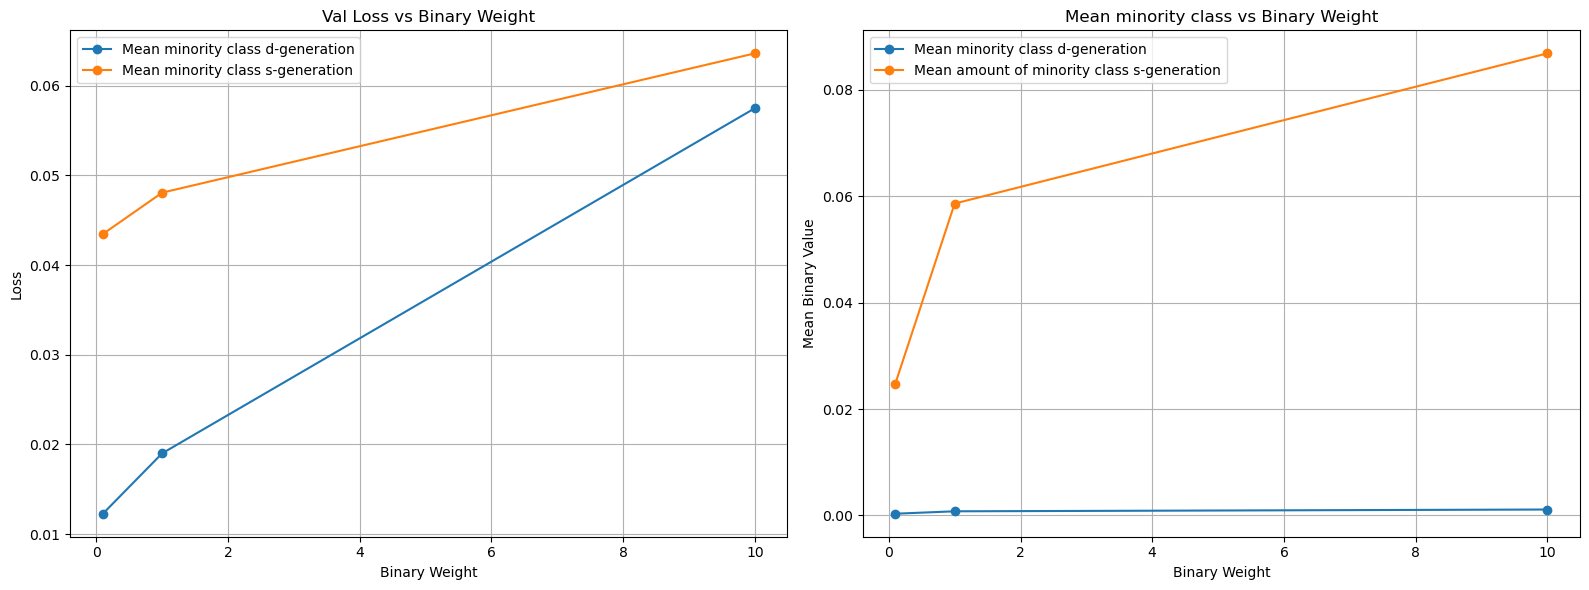

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting for the first subplot
axs[0].plot(
    grouped_df_binar_weight.index,
    grouped_df_binar_weight["val_loss"],
    marker="o",
    label="Mean minority class d-generation",
)
axs[0].plot(
    grouped_df_binar_weight.index,
    grouped_df_binar_weight["val_loss_sample"],
    marker="o",
    label="Mean minority class s-generation",
)
axs[0].set_xlabel("Binary Weight")
axs[0].set_ylabel("Loss")
axs[0].set_title("Val Loss vs Binary Weight")
axs[0].legend()
axs[0].grid(True)

# Plotting for the second subplot
axs[1].plot(
    grouped_df_binar_weight.index,
    grouped_df_binar_weight["val_mean_binary_value"],
    marker="o",
    label="Mean minority class d-generation",
)
axs[1].plot(
    grouped_df_binar_weight.index,
    grouped_df_binar_weight["val_mean_binary_value_sample"],
    marker="o",
    label="Mean amount of minority class s-generation",
)
axs[1].set_xlabel("Binary Weight")
axs[1].set_ylabel("Mean Binary Value")
axs[1].set_title("Mean minority class vs Binary Weight")
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [2]:
# Monte Carlo Attack Visulization

In [ ]:
# Given data
x_values = [1, 10, 50, 100, 150, 200, 250]
y_values = [
    0.1680271481718225,
    0.12753248281260685,
    0.1045032404630585,
    0.10590153251721841,
    0.10476171980486525,
    0.10129091726329481,
    0.1021600250175849,
]

y_values_accuracy = [0.03, 0.325, 0.415, 0.465, 0.5, 0.475, 0.35]

# Plotting the values
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting the 0.1 Percentile Distance
ax1.plot(x_values, y_values, marker="o", linestyle="-", color="b")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("0.1 Percentile Distance", color="b")
ax1.set_title("0.1 Percentile Distance and Accuracy vs. Epoch")
ax1.tick_params(axis="y", labelcolor="b")

# Creating a secondary y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(x_values, y_values_accuracy, marker="s", linestyle="--", color="r")
ax2.set_ylabel("Accuracy", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Adding grid
ax1.grid(True)

# Displaying the plot
plt.show()